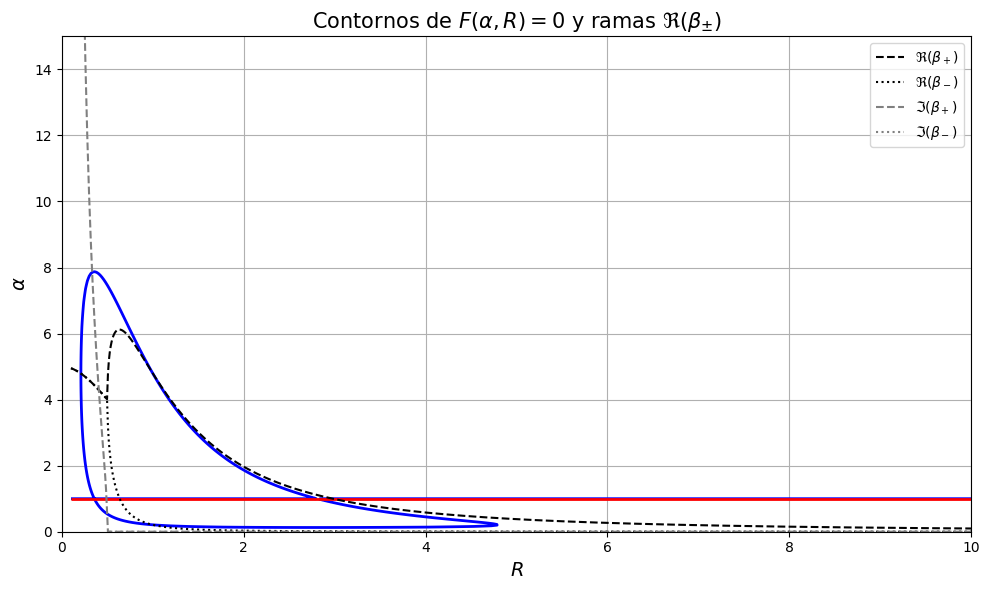

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 1
n1 = 0
n2 = 1
gamma = 10  # gamma fijo

# Grillas para alpha y R
alpha_vals = np.arange(0.1, 15.1, 0.02)
R_vals = np.arange(0.1, 10.1, 0.02)
ALPHA, R = np.meshgrid(alpha_vals, R_vals)

# Funciones implícitas F1 y F2
F1 = k * ((1 / ALPHA) - ALPHA) * (-1) ** n1 + gamma * ((1 / (1 + R**2)) - (1 / (1 + ALPHA**2 * R**2)))
F2 = k * ((1 / ALPHA) - ALPHA) * (-1) ** n2 + gamma * ((1 / (1 + R**2)) - (1 / (1 + ALPHA**2 * R**2)))

# Expresiones explícitas para beta = alpha
R_plot = np.linspace(0.1, 10, 1000)
A2 = R_plot ** 2
discriminant = gamma**2 * A2**2 - 4 * k**2 * (1 + A2)**2
sqrt_term = np.sqrt(discriminant.astype(complex))  # permitir raíces complejas

# Definir beta como números complejos y tomar parte real
beta_plus = (gamma * A2 + sqrt_term) / (2 * k * A2 * (1 + A2))
beta_minus = (gamma * A2 - sqrt_term) / (2 * k * A2 * (1 + A2))

# Graficar
plt.figure(figsize=(10, 6))
plt.contour(R, ALPHA, F1, levels=[0], colors='b', linewidths=2)
plt.contour(R, ALPHA, F2, levels=[0], colors='r', linewidths=2)
plt.plot(R_plot, np.real(beta_plus), 'k--', label=r'$\Re(\beta_+)$')
plt.plot(R_plot, np.real(beta_minus), 'k:', label=r'$\Re(\beta_-)$')
plt.plot(R_plot, np.imag(beta_plus), 'gray', linestyle='--', label=r'$\Im(\beta_+)$')
plt.plot(R_plot, np.imag(beta_minus), 'gray', linestyle=':', label=r'$\Im(\beta_-)$')

plt.xlim(0, 10)
plt.ylim(0, 15)
plt.xlabel(r'$R$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
plt.title(r'Contornos de $F(\alpha, R) = 0$ y ramas $\Re(\beta_{\pm})$', fontsize=15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()